# Исследование спроса на авиабилеты

#### Тема проекта:
- Исследование спроса на авиабилеты в города, где проходят фестивали

#### Цель:
- Проанализировать спрос пассажиров и проверить гипотезу

#### Поставленные задачи:
- Рассчитать количество рейсов для каждой модели самолёта;
- Определить среднее количество рейсов для городов;
- Определить топ-10 городов с наибольшим количеством рейсов;
- Проверить гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

#### Краткий план работы:
- [Шаг 1. Аналитика данных](#Шаг-1.-Аналитика-данных)
- [Шаг 2. Проверка гипотезы](#Шаг-2.-Проверка-гипотезы)

#### Вывод:
- Рассчитаны необходимые показатели для моделей самолёта и городов;
- Проверена гипотеза.

**Статус проекта**: проект завершён.

**Используемые библиотеки**: *numpy*, *pandas*, *matplotlib*, *seaborn*, *pylab*, *scipy*, *statsmodels*

**Источник данных**: [курс Data Science от Яндекс.Практикум](https://praktikum.yandex.ru/profile/data-scientist/)

In [1]:
# отключение предупреждений
import warnings
warnings.filterwarnings('ignore') 

# импорт библиотек и функция для дальнейшей работы
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py 
from scipy import stats as st
import statsmodels.api as sm 

## Шаг 1. Аналитика данных

Разобьём шаг на два этапа и последовательно изучим предоставленные файлы:

- [1.1. Изучение файла query_1.csv](#1.1.-Изучение-файла-query_1.csv)
- [1.2. Изучение файла query_3.csv](#1.2.-Изучение-файла-query_3.csv)

Выгрузим файлы и посмотрим общую информацию по данным с помощью функции:

In [2]:
def read_info(file_path):    
    """Функция возвращает датафрейм, выводит количество дубликатов, общую информацию:
    - file_path - путь к файлу .csv."""
    
    # выгрузка файла
    df = pd.read_csv(file_path)
    
    # проверка на дубликаты
    print('Количество дубликатов:', df.duplicated().sum())
    print()
    
    # общая информация
    print(df.info())
    
    # вывод первых строк
    return df

### 1.1. Изучение файла query_1.csv

In [3]:
# открытие файла query_1.csv
aircraft = read_info('datasets/query_1.csv')
aircraft

Количество дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


#### Датафрейм aircraft:
- **Размер.** Файл содержит **8 строк и 2 столбца** (модель самолёта и количество совершённых полётов).
- **Тип данных** соответствует содержимому, изменения не требуются.
- **Дубликаты** и **пропуски** отсутствуют.

Для наглядности визуализируем результаты с помощью функции:

In [4]:
def barh_plot(df_name, col_name, title, xlabel, ylabel, xticks=None):
    
    """Функция возвращает горизонтальный barchart с подписанными значениями:
    - df_name - наименование датафрейма;
    - col_name - наименование колонки;
    - title - значение title;
    - xlabel - значение xlabel;
    - ylabel - значение ylabel;
    - xticks - значение xticks."""
    
    df_name.plot(kind='barh', figsize=(8, 5))
    y = [np.round(i, 2) for i in df_name[col_name].values]
    for index, value in enumerate(y):
        plt.text(value, index, str(value))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(xticks)
    plt.show()

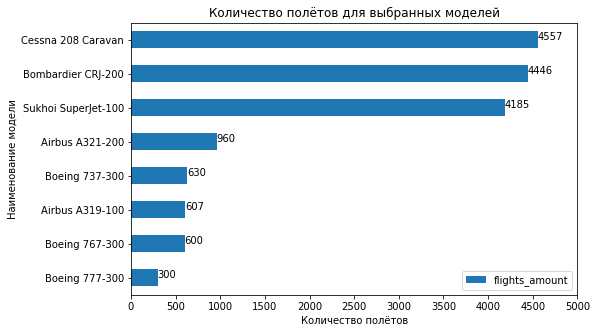

In [5]:
# настройка датафрейма
aircraft = aircraft.set_index('model').sort_values(by='flights_amount')

# построение barh
barh_plot(aircraft, 'flights_amount', 'Количество полётов для выбранных моделей',
          'Количество полётов', 'Наименование модели', np.arange(0, 5001, 500))

- **Больше всего** полётов за указанный период (сентябрь 2018) совершили самолёты моделей:
 - [*Cessna 208 Caravan*](https://en.wikipedia.org/wiki/Cessna_208_Caravan) - **4557 полётов**.  
 Небольшой самолёт с неубирающимися шасси. Он может использоваться для обучающих полётов, региональных рейсов и VIP-перевозок. Возможно, благодаря разнообразию целей использования и компактности, такая модель является очень популярной и совершает много полётов.
 - [*Bombardier CRJ-200*](https://ru.wikipedia.org/wiki/Bombardier_CRJ200) - **4446 полётов**.  
 Среднемагистральный пассажирский самолет для местных авиалиний, разработанный канадской фирмой.  
 Он также эксплуатируется в России, но, по общему впечатлению, упоминается реже, чем, например *Airbus* и *Boeing*, которые в нашем случае не попали в топ (подробнее - ["Какие самолёты летают в России"](https://www.rbc.ru/photoreport/27/11/2015/5655a9989a79479570a1d5f3)). 
 - [*Sukhoi SuperJet-100*](https://en.wikipedia.org/wiki/Sukhoi_Superjet_100) - **4185 полётов**.  
 Отечественная модель, использование которой поддерживается на государственном уровне .


- **Меньше всего** полётов совершили самолёт модели [*Boeing 777-300*](https://en.wikipedia.org/wiki/Boeing_777) - **300 полётов**.

Если обратиться к базе и вывести с использованием SQL информацию из таблицы по моделям, видим следующее:

In [6]:
aircrafts_sql = pd.DataFrame({
    'aircraft_code': ['CN1', 'CR2', 'SU9', '733', '321', '320', '319', '763', '773'],
    'model': ['Cessna 208 Caravan', 'Bombardier CRJ', 'Sukhoi SuperJet-100', 'Boeing 737-300', 'Airbus A321-200',
              'Airbus A320', 'Airbus A319', 'Boeing 767-300', 'Boeing 777-300'],
    'range': [1200, 2700, 3000, 4200, 5600, 5700, 6700, 7900, 11100]
})

aircrafts_sql

,aircraft_code,model,range
0,CN1,Cessna 208 Caravan,1200
1,CR2,Bombardier CRJ,2700
2,SU9,Sukhoi SuperJet-100,3000
3,733,Boeing 737-300,4200
4,321,Airbus A321-200,5600
5,320,Airbus A320,5700
6,319,Airbus A319,6700
7,763,Boeing 767-300,7900
8,773,Boeing 777-300,11100


Колонка *range* - это дальность полёта.
- Самолёты из *топ-3* с максимальным количеством рейсов имеют **самую короткую** дальность полёта.  
- Модель *Boeing 777-300*, находящаяся на последнем месте, имеет **самую длинную** дальность полёта.

Такая закономерность может быть связана с тем, что для регулярных коротких перевозок нецелесообразно использовать самолёты, предназначенные для длительных полётов. Поэтому в топ попали модели с самой маленькой дальностью полёта.

### 1.2. Изучение файла query_3.csv

In [7]:
# открытие файла query_3.csv
city = read_info('datasets/query_3.csv')
city.head()

Количество дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


#### Датафрейм city:
- **Размер.** Файл содержит **101 строкy и 2 столбца** (название города и среднее количество прибывающих рейсов).
- **Тип данных** соответствует содержимому, изменения не требуются.
- **Дубликаты** и **пропуски** отсутствуют.

Посмотрим на распределение количества полётов:

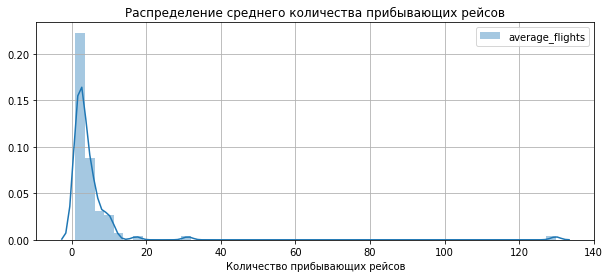

In [8]:
# настройка датафрейма
city = city.set_index('city').sort_values(by='average_flights')

# построение гистограммы
plt.figure(figsize=(10,4))
sns.distplot(city, kde=True, label=city.columns)
plt.title('Распределение среднего количества прибывающих рейсов')
plt.xlabel('Количество прибывающих рейсов')
plt.legend()
plt.grid()
plt.show()

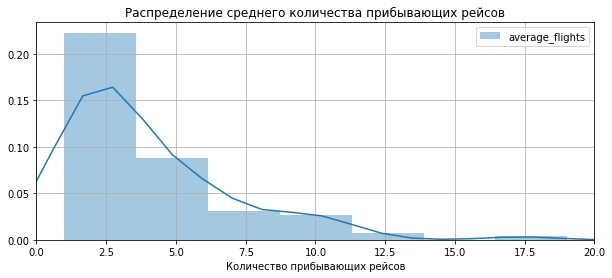

In [9]:
# построение гистограммы, с лимитом
plt.figure(figsize=(10,4))
sns.distplot(city, kde=True, label=city.columns, bins=50)
plt.title('Распределение среднего количества прибывающих рейсов')
plt.xlabel('Количество прибывающих рейсов')
plt.xlim(0, 20)
plt.legend()
plt.grid()
plt.show()

In [10]:
# вывод сводной статистики
city.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


- Среднее количество рейсов для города - **5 рейсов**, значение медианы - **3 рейса**.
- Для 75% выбранных городов количество прибывающих рейсов в день **не превышает 6**.
- Из-за наличия выброса **129 рейсов в день** данные смещены вправо.
- **Минимальное** значение - **1 рейс в день**.

Для **топ-10** городов построим *barchart*:

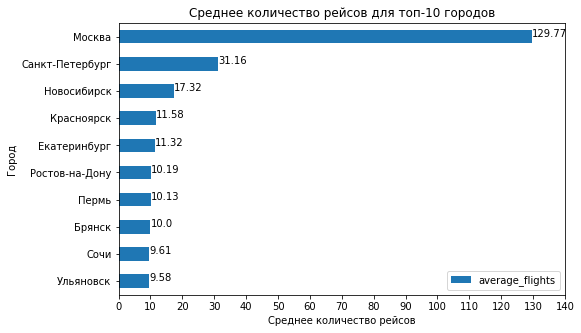

In [11]:
# построение barh
barh_plot(city.tail(10), 'average_flights', 'Среднее количество рейсов для топ-10 городов',
          'Среднее количество рейсов', 'Город', np.arange(0, 141, 10))

- Выброс со значением **129 рейсов** приходится на **Москву**.
- В **топ-3** входят [самые крупные города России](http://www.statdata.ru/goroda-millionniki-rossii-po-naseleniu/201x) - **Москва**, **Санкт-Петербург** и **Новосибирск**.
- В топ также входят другие города-миллионники - **Красноярск, Екатеринбург, Ростов-на-Дону и Пермь**.
- **Сочи** является популярным курортным городом. Кроме того, сентябрь - это ещё сезон, поэтому неудивительно, что город попал в топ-10.
- Население **Брянска** - около 400 тыс. человек, а **Ульяновска** - около 600 тыс. человек. Города не входят в список миллионников, однако также попали в топ-10.

## Шаг 1. Вывод

Были рассмотрены предоставленные файлы:

#### [1.1. Изучение файла query_1.csv](#1.1.-Изучение-файла-query_1.csv)  

- **Датафрейм aircraft**  
 - **Размер.** Файл содержит **8 строк и 2 столбца** (модель самолёта и количество совершённых полётов).
 - **Тип данных** соответствует содержимому, изменения не требуются.
 - **Дубликаты** и **пропуски** отсутствуют.


- **Анализ графиков**
 - **Больше всего** полётов за указанный период (сентябрь 2018) совершили самолёты моделей:
   - [*Cessna 208 Caravan*](https://en.wikipedia.org/wiki/Cessna_208_Caravan) - **4557 полётов**;  
   - [*Bombardier CRJ-200*](https://ru.wikipedia.org/wiki/Bombardier_CRJ200) - **4446 полётов**;  
   - [*Sukhoi SuperJet-100*](https://en.wikipedia.org/wiki/Sukhoi_Superjet_100) - **4185 полётов**.  
- **Меньше всего** полётов совершили самолёт модели [*Boeing 777-300*](https://en.wikipedia.org/wiki/Boeing_777) - **300 полётов**.


- **Проверка данных в базе**
 - Самолёты из *топ-3* с максимальным количеством рейсов имеют **самую короткую** дальность полёта.  
 - Модель *Boeing 777-300*, находящаяся на последнем месте, имеет **самую длинную** дальность полёта.  
 - Такая закономерность может быть связана с тем, что для регулярных коротких перевозок нецелесообразно использовать самолёты, предназначенные для длительных полётов. Поэтому в топ попали модели с самой маленькой дальностью полёта.

#### [1.2. Изучение файла query_3.csv](#1.2.-Изучение-файла-query_3.csv)

- **Датафрейм city** 
 - **Размер.** Файл содержит **101 строкy и 2 столбца** (название города и среднее количество прибывающих рейсов).
 - **Тип данных** соответствует содержимому, изменения не требуются.
 - **Дубликаты** и **пропуски** отсутствуют.


- **Анализ графиков (распределение рейсов)**
 - Среднее количество рейсов для города - **5 рейсов**, значение медианы - **3 рейса**.
 - Для 75% выбранных городов количество рейсов в день **не превышает 6**.
 - Из-за наличия выброса **129 рейсов в день** данные смещены вправо.
 - **Минимальное** значение - **1 рейс в день**.


- **Анализ графиков (топ-10 городов)**
 - Выброс со значением **129 рейсов** приходится на **Москву**.
 - В **топ-3** входят [самые крупные города России](http://www.statdata.ru/goroda-millionniki-rossii-po-naseleniu/201x) - **Москва**, **Санкт-Петербург** и **Новосибирск**.
 - В топ также входят другие города-миллионники - **Красноярск, Екатеринбург, Ростов-на-Дону и Пермь**.
 - **Сочи** является популярным курортным городом. Кроме того, сентябрь - это ещё сезон, поэтому неудивительно, что город попал в топ-10.
 - Население **Брянска** - около 400 тыс. человек, а **Ульяновска** - около 600 тыс. человек. Города не входят в список миллионников, однако также попали в топ-10.

## Шаг 2. Проверка гипотезы

In [12]:
# открытие файла /datasets/query_last.csv
festival = read_info('datasets/query_last.csv')
festival.sort_values(by='ticket_amount')

Количество дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   week_number    10 non-null     int64  
 1   ticket_amount  10 non-null     int64  
 2   festival_week  3 non-null      float64
 3   festival_name  3 non-null      object 
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes
None


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
5,35,51360,NaN,NaN
3,33,51378,NaN,NaN
6,36,51386,36.0,Видфест
4,34,51492,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN
7,37,51670,NaN,NaN
2,32,51675,NaN,NaN


#### Датафрейм festival:
- **Размер.** Файл содержит **10 строк и 4 столбца** (номер недели, количество билетов, неделя фестиваля, наименование фестивала).
- **Тип данных** соответствует содержимому, изменения не требуются. Колонка *festival_week* имеет тип данных *float* из-за наличия **пропусков**.
- **Пропуски** в колонках *festival_week* и *festival_name* имеют смысл -  на данной неделе не было фестивала.
- **Дубликаты** отсутствуют. 

In [13]:
# создание выборок
fest_no = festival[festival['festival_week'].isnull()]['ticket_amount'].values
fest_yes = festival[festival['festival_week'].notnull()]['ticket_amount'].values

print(f'Среднее значение выборки для неделей без фестивалей {fest_no.mean()}')
print(f'Среднее значение выборки для неделей c фестивалями {fest_yes.mean()}')

Среднее значение выборки для неделей без фестивалей 51530.857142857145
Среднее значение выборки для неделей c фестивалями 48662.666666666664


На первый взгляд количество билетов на время фестиваля **отличается** от обычной недели.  
Однако отличие не совсем такое, как можно подумать: количество билетов на время фестивалей не больше, а **меньше**, чем в обычные недели.

Тем не менее, следует проверить гипотезу:  
***Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время***.

Сформулируем нулевую и альтернативную гипотезу:  
- **Нулевая гипотеза H₀**: Среднее количество проданных билетов во время фестивалей **не отличается** от среднего количества проданных билетов в обычное время, т. е. спрос одинаковый.
- **Альтернативная гипотеза H₁**: Среднее количество проданных билетов во время фестивалей **отличается** от среднего количества проданных билетов в обычное время, т. е. спрос разный.

Необходимо сравнить *средний спрос*, т. е. среднее количество билетов, для двух выборок *Есть фестиваль* и *Нет фестиваля*.  
- Проблема в том, что размер сравниваемых выборок **очень маленький**.
- Для многих тестов необходимо, чтобы данные внутри каждой группы были **распределены нормально**.  
Так, для 3 значений *Есть фестиваль* затруднительно определить, нормальное ли распределение.

Для наглядности построим **график QQ-plot** для значений каждой выборки и используем тест **Шапиро-Уилка** для проверки распределения на нормальность:

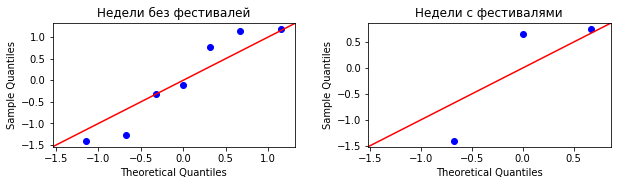

In [14]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

plt.subplots_adjust(wspace=0.3, hspace=None)

ax1.title.set_text('Недели без фестивалей')
ax2.title.set_text('Недели с фестивалями')

sm.qqplot(st.zscore(fest_no), line ='45', ax=ax1)
sm.qqplot(st.zscore(fest_yes), line ='45', ax=ax2)

py.show()

In [15]:
# тест Шапиро-Уилка
for k, v in {'Датафрейм "Нет фестиваля"': st.shapiro(fest_no), 'Датафрейм "Есть фестиваль"': st.shapiro(fest_yes)}.items():
    print(k)
    alpha = .05
    if st.shapiro(fest_no)[1] >= alpha:
        print(f'Не получилось отвергнуть нулевую гипотезу, значение p-value {v[1]}')
    else:
        print(f'Отвергаем нулевую гипотезу, значение p-value {v[1]}')
    print()

Датафрейм "Нет фестиваля"
Не получилось отвергнуть нулевую гипотезу, значение p-value 0.29630061984062195

Датафрейм "Есть фестиваль"
Не получилось отвергнуть нулевую гипотезу, значение p-value 0.07614270597696304



- В данном случае при проверке распределения на нормальность с помощью теста **Шапиро-Уилка** у нас **не получилось** отвергнуть нулевую гипотезу, т. е. распределение не отличается от нормального.
- Однако, как было сказано выше, количество наблюдений в выборках **слишком маленькое**.

Когда нет уверенности относительно нормального распределения данных, рекомендуется использование **непараметрических** тестов.

Для сравнения результатов используем **оба теста**: *парный t-тест для независимых выборок* (параметрический) и *U-критерий Манна-Уитни* (непараметрический).

In [16]:
# парный t-тест для независимых выборок
alpha = .05 

results = st.ttest_ind(fest_no, fest_yes)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


In [17]:
# U-критерий Манна-Уитни
alpha = .05 

results = st.mannwhitneyu(fest_no, fest_yes)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03412374418900064
Отвергаем нулевую гипотезу


- В случае с *парным t-тестом для независимых выборок* у нас **не получилось** отвергнуть нулевую гипотезу, т. е. спрос на билеты **одинаковый**.
- В случае в *U-критерием Манна-Уитни* у нас **получилось** отвергнуть нулевую гипотезу, т. е. спрос на билеты **различается**.

Тем не менее, поскольку элементов в выборках **очень мало**, сделать какие-либо однозначные выводы представляется **затруднительным**. Следовало бы рассмотреть выборку с большим количеством элементов.  

Мы дополнительно проверили, возможно ли **расширить выборку** за счёт существующих данных. Например, взять более продолжительный период или другой год (хотя здесь возникает риск сезонности). Дополнительных данных не оказалось: максимальное количество фестивалей **в Москве** (3 фестиваля) и **в Санкт-Петербурге** (2 фестиваля).  

## Вывод 2

- **Сформулированы H₀ и H₁:**
 - **Нулевая гипотеза H₀**: Среднее количество проданных билетов во время фестивалей **не отличается** от среднего количества проданных билетов в обычное время, т. е. спрос одинаковый.
 - **Альтернативная гипотеза H₁**: Среднее количество проданных билетов во время фестивалей **отличается** от среднего количества проданных билетов в обычное время, т. е. спрос разный.


- **Обнаружены следующие проблемы:**
 - Размер сравниваемых выборок **очень маленький**.
 - Для многих тестов необходимо, чтобы данные внутри каждой группы были **распределены нормально**.  
 
 
- **Проведение проверки гипотезы:**
 - Для данных, где нет уверенности относительно нормальности распределения, принято использовать **непараметрические тесты**.
 - Для сравнения результатов было принято решение использовать **два теста**: *парный t-тест для независимых выборок* (параметрический) и *U-критерий Манна-Уитни* (непараметрический).
 - В случае с *парным t-тестом для независимых выборок* у нас **не получилось** отвергнуть нулевую гипотезу, т. е. спрос на билеты **одинаковый**.
 - В случае в *U-критерием Манна-Уитни* у нас **получилось** отвергнуть нулевую гипотезу, т. е. спрос на билеты **различается**.


- Дополнительно было проверено, возможно ли **расширить выборку** за счёт существующих данных. Например, взять более продолжительный период или другой год. Дополнительных данных не оказалось.



- Поскольку элементов в выборках **очень мало**, сделать какие-либо однозначные выводы представляется **затруднительным**.

# Итоговый вывод

### 1. Анализ
- Рассмотрены исходные файлы для анализа: *query_1.csv* (модели самолётов) и *query_3.csv* (количество прибывающих рейсов для городов).
- Проблем с выгруженными данными нет: отсутствуют пропуски, дубликаты, тип данных соответствует содержимому.
- Самые популярные **модели самолётов**: *Cessna 208 Caravan*, *Bombardier CRJ-200*, *Sukhoi SuperJet-100*.
- Эти самолёты имеют **самую короткую** дальность полёта. Такая закономерность может быть связана с тем, что для регулярных коротких перевозок нецелесообразно использовать самолёты, предназначенные для длительных полётов.
- Для большинства выбранных **городов** количество прибывающих рейсов в день **не превышает 6**.
- Больше всего рейсов прибывает в **Москву** - в среднем **129 рейсов в день**.

### 2. Проверка гипотезы
- Сформулированы H₀ и H₁:
 - **Нулевая гипотеза H₀**: Среднее количество проданных билетов во время фестивалей **не отличается** от среднего количества проданных билетов в обычное время, т. е. спрос одинаковый.
 - **Альтернативная гипотеза H₁**: Среднее количество проданных билетов во время фестивалей **отличается** от среднего количества проданных билетов в обычное время, т. е. спрос разный.


- Поскольку размер выборок (недели с фестивалями и без) **очень маленький**, то не совсем корректно использовать методы, требующие **нормального распределения** внутри групп.


- Тем не менее, для сравнения результатов было принято решение использовать **два теста**: *парный t-тест для независимых выборок* (параметрический) и *U-критерий Манна-Уитни* (непараметрический):
 - В случае с *парным t-тестом для независимых выборок* у нас **не получилось** отвергнуть нулевую гипотезу, т. е. спрос на билеты **одинаковый**.
 - В случае в *U-критерием Манна-Уитни* у нас **получилось** отвергнуть нулевую гипотезу, т. е. спрос на билеты **различается**.


- Дополнительно было проверено, возможно ли **расширить выборку** за счёт существующих данных. Например, взять более продолжительный период или другой год. Дополнительных данных не оказалось.
- Поскольку элементов в выборках **очень мало**, сделать какие-либо однозначные выводы представляется **затруднительным**.